<a href="https://colab.research.google.com/github/Kaiweismee/TEXT/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OpenCV = library for image and video processing

object detection = identify and locate objects in an image or video


In [6]:
import cv2
from google.colab.patches import cv2_imshow

In [12]:
#load the image
img = cv2.imread('/content/elephant.jpg')

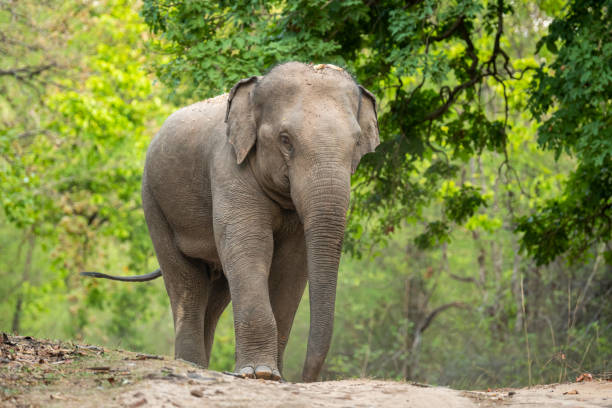

-1

In [13]:
#Display the image
cv2_imshow(img)
cv2.waitKey(0)

In [14]:
className = []
classFile = '/content/coco.names'

#Read class name from the file
with open(classFile,'rt') as f:
  className = f.read().rstrip('\n').split('\n')

print(className)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [15]:
configPath = '/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = '/content/frozen_inference_graph.pb'

#Load the model
net = cv2.dnn_DetectionModel(weightsPath,configPath)
#configure the model
net.setInputSize(320,320)
net.setInputScale(1.0/127.5)
net.setInputMean((127.5,127.5,127.5))
net.setInputSwapRB(True)

< cv2.dnn.Model 0x7d2571311710>

In [17]:
classIds, confs, bbox = net.detect(img,confThreshold=0.7)

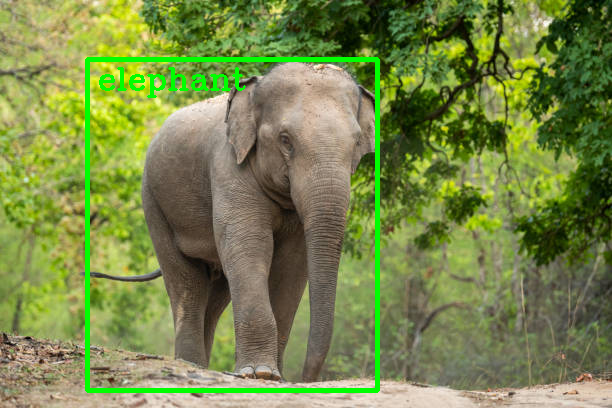

-1

In [18]:
for classId, confidence, box in zip(classIds.flatten(),confs.flatten(),bbox):
 x,y,w,h = box
cv2.rectangle(img,(x,y),(x+w,y+h),color = (0,255,0),thickness=3)
cv2.putText(img,className[classId-1],(x+10,y+30),
cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
cv2_imshow(img)
cv2.waitKey(0)

load and display the image
load class names and a pre-trained model
detect object and visuzlized the results